# The linear regression algorithm

1. Pick a random line.
2. Repeat many times:

    2.1 Pick a random data point.
    
    2.2 Move the line a little closer to that point.
3. Return the line you’ve obtained.

Case 1: If the point is above the line and to the right of the y-axis, we rotate the line counterclockwise and translate it upward.

Case 2: If the point is above the line and to the left of the y-axis, we rotate the line clockwise and translate it upward.

Case 3: If the point is below the line and to the right of the y-axis, we rotate the line clockwise and translate it downward.

Case 4: If the point is below the line and to the left of the y-axis, we rotate the line counterclockwise and translate it downward.

## Changing the slope:

- If we increase the slope of a line, the line will rotate counterclockwise.
- If we decrease the slope of a line, the line will rotate clockwise.


## Changing the y-intercept:

- If we increase the y-intercept of a line, the line is translated upward.
- If we decrease the y-intercept of a line, the line is translated downward.

In [34]:
# Utils

import numpy as np
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')

[1 2 3 5 6 7]
[155 197 244 356 407 448]


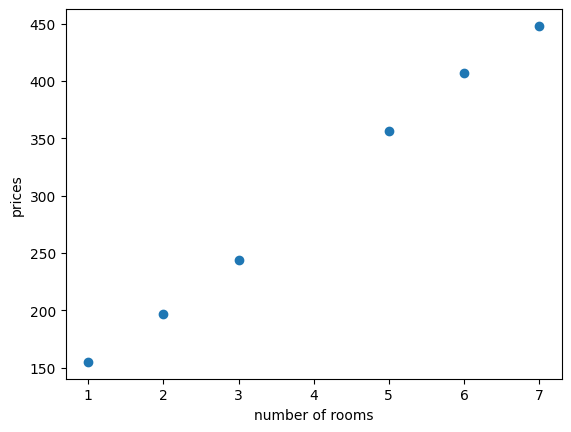

In [35]:
from matplotlib import pyplot as plt
import numpy as np
import random


# Defining and plotting our dataset
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)
plot_points(features, labels)

In [36]:
# Coding the tricks
# Simple trick
# Absolute trick
# Square trick

def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

Price per room: 51.05347808556453
Base price: 99.0970202799414


(np.float64(51.05347808556453), np.float64(99.0970202799414))

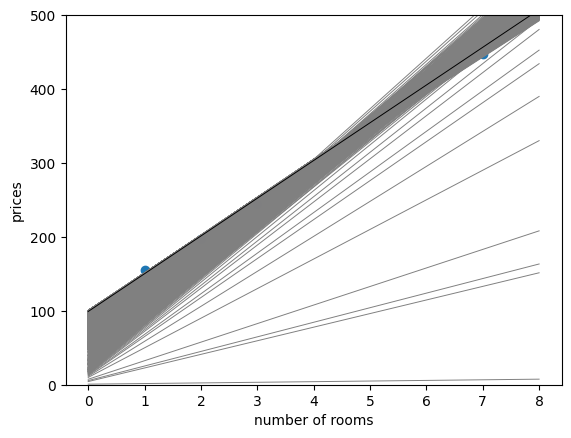

In [37]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

In [38]:
# Regresión Lineal Múltiple
import random
import numpy as np

# Datos de ejemplo: [número de habitaciones, distancia al centro], precio
features = np.array([
    [2, 5],
    [3, 4],
    [4, 3],
    [5, 2],
    [6, 1]
])
labels = np.array([150, 200, 250, 300, 350])

def square_trick_multi(b, weights, features, label, learning_rate):
    """
    Versión multivariable del square trick
    """
    # Calcular la predicción actual y = w1*x1 + w2*x2 + ... + b
    prediction = np.dot(weights, features) + b
    
    # Actualizar el intercepto (b)
    b += learning_rate * (label - prediction)
    
    # Actualizar cada peso (w_i)
    for i in range(len(weights)):
        weights[i] += learning_rate * (label - prediction) * features[i]
    
    return weights, b

def linear_regression_multi(features, labels, learning_rate=0.01, epochs=10000):
    # Inicializar pesos aleatorios (uno por característica)
    weights = [random.random() for _ in range(features.shape[1])]
    b = random.random()
    
    for epoch in range(epochs):
        # Seleccionar un punto aleatorio
        i = random.randint(0, len(features)-1)
        sample_features = features[i]
        label = labels[i]
        
        # Aplicar el square trick multivariable
        weights, b = square_trick_multi(b, weights, sample_features, label, learning_rate)
        
        # Imprimir progreso cada 1000 épocas
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: w = {weights}, b = {b:.2f}")
    
    print("\nResultado final:")
    print(f"Pesos: {weights}")
    print(f"Intercepto: {b:.2f}")
    return weights, b

# Ejecutar la regresión lineal
weights, b = linear_regression_multi(features, labels, learning_rate=0.001, epochs=10000)

Epoch 0: w = [np.float64(2.2438999165831537), np.float64(0.6048316113575414)], b = 0.60
Epoch 1000: w = [np.float64(55.53145385841412), np.float64(6.201743723211744)], b = 9.02
Epoch 2000: w = [np.float64(55.849441990048845), np.float64(5.862124449824403)], b = 9.01
Epoch 3000: w = [np.float64(55.85518928470619), np.float64(5.855424894014173)], b = 9.01
Epoch 4000: w = [np.float64(55.85529294482067), np.float64(5.855297928404153)], b = 9.01
Epoch 5000: w = [np.float64(55.855295256041245), np.float64(5.855295348079814)], b = 9.01
Epoch 6000: w = [np.float64(55.85529529107276), np.float64(5.855295293059377)], b = 9.01
Epoch 7000: w = [np.float64(55.855295291957596), np.float64(5.855295291988424)], b = 9.01
Epoch 8000: w = [np.float64(55.85529529197102), np.float64(5.855295291971558)], b = 9.01
Epoch 9000: w = [np.float64(55.85529529197112), np.float64(5.8552952919713395)], b = 9.01

Resultado final:
Pesos: [np.float64(55.85529529197112), np.float64(5.855295291971332)]
Intercepto: 9.01


## The error function 

The error function measures this by assigning a large value to the bad model on the left and a small value to the good model on the right.
Error functions are also sometimes called loss functions or cost functions on the literature.

We have two common ways to do this called the absolute error and the square error. In short, the absolute error is the sum of vertical distances from the line to the points in the dataset, and the square error is the sum of the squares of these distances.

### The absolute error: A metric that tells us how good our model is by adding distances

In this section we look at the absolute error, which is a metric that tells us how good our model is. The absolute error is the sum of the distances between the data points and the line. Why is it called the absolute error? To calculate each of the distances, we take the difference between the label and the predicted label. This difference can be positive or negative depending on whether the point is above or below the line. To turn this difference into a number that is always positive, we take its absolute value.


### The square error

The square error is very similar to the absolute error, except instead of taking the absolute value of the difference between the label and the predicted label, we take the square. This always turns the number into a positive number, because squaring a number always makes it positive. The process is illustrated in figure 3.19, where the square error is illustrated as the sum of the areas of the squares of the lengths from the points to the line. You can see how the bad model on the left has a large square error, whereas the good model on the right has a small square error.

Como se mencionó anteriormente, el error cuadrático se usa con más frecuencia en la práctica que el error absoluto. ¿Por qué? Un cuadrado tiene una derivada mucho más precisa que un valor absoluto, lo cual resulta útil durante el proceso de entrenamiento.


### Mean absolute and (root) mean square errors

Mean absolute and (root) mean square errors are more common in real life.
Throughout this chapter we use absolute and square errors for illustration purposes. However, in practice, the mean absolute error and the mean square error are used much more commonly. These are defined in a similar way, except instead of calculating sums, we calculate averages

Why are they more common? Imagine if we’d like to compare the error or a model using two datasets, one with 10 points and one with 1 million points. If the error is a sum of quantities, one for every point, then the error is probably much higher on the dataset of 1 million points, because we are adding many more numbers. If we want to compare them properly, we instead use averages in the calculation of our error to obtain a measure of how far the line is from each point on average.


###  Root mean square
For illustration purposes, another error commonly used is the root mean square error, or RMSE for short. As the name implies, this is defined as the root of the mean square error. It is used to match the units in the problem and also to give us a better idea of how much error the model makes in a prediction

Example: 

if we are trying to predict house prices, then the units of the price and the predicted price are, for example, dollars ($). The units of the square error and the mean square error are dollars squared, which is not a common unit. If we take the square root, then not only do we get the correct unit, but we also get a more accurate idea of roughly by how many dollars the model is off per house. Say, if the root mean square error is $10,000, then we can expect the model to make an error of around $10,000 for any prediction we make.

In [39]:
def abs_error(features, labels, slope, intercept):
    abs_error = 0
    for i in range(len(features)):
        predicted_price = slope * features[i] + intercept
        abs_error += abs(predicted_price - labels[i])

    return abs_error

def square_error(features, labels, slope, intercept):
    square_error = 0
    for i in range(len(features)):
        predicted_price = slope * features[i] + intercept
        square_error += (predicted_price - labels[i])**2

    return square_error

def mean_square_abs_error(features, labels, slope, intercept):
    abs_error = 0
    for i in range(len(features)):
        predicted_price = slope * features[i] + intercept
        abs_error += abs(predicted_price - labels[i])

    return abs_error / len(features)

def mean_square_error(features, labels, slope, intercept):
    square_error = 0
    for i in range(len(features)):
        predicted_price = slope * features[i] + intercept
        square_error += (predicted_price - labels[i])**2

    return square_error / len(features)


## Gradient descent works as follows

Gradient descent: How to decrease an error function by slowly descending from a mountain

1. Start somewhere on the mountain.
1. Find the best direction to take one small step.
1. Take this small step.
1. Repeat steps 2 and 3 many times.

Price per room: 50.58626833286795
Base price: 99.27623780769314


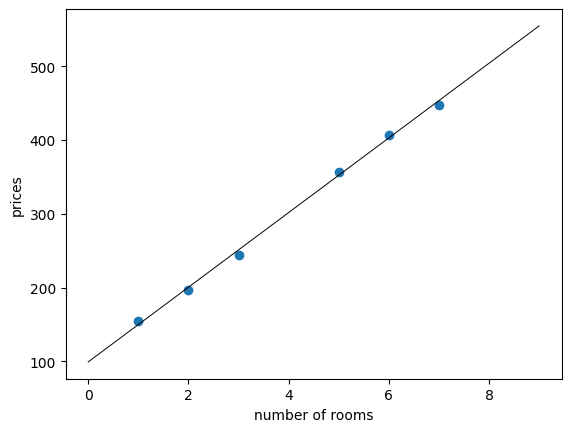

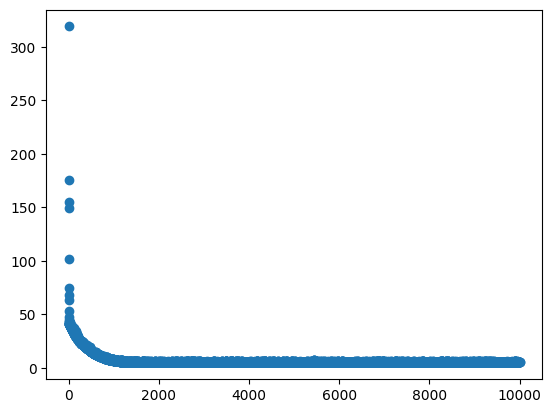

(np.float64(50.58626833286795), np.float64(99.27623780769314))

In [ ]:
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))


def linear_regression_with_rmse(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = price_per_room * features + base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

features_1d = np.array([1,2,3,5,6,7])
labels_1d = np.array([155, 197, 244, 356, 407, 448])

linear_regression_with_rmse(features_1d, labels_1d, learning_rate = 0.01, epochs = 10000)

In general, the error function gives us good information to decide when to stop running the algorithm. Often, this decision is based on the time and the computational power available to us. However, other useful benchmarks are commonly used in the practice, such as the following:

When the loss function reaches a certain value that we have predetermined
When the loss function doesn’t decrease by a significant amount during several epochs

## What if the data is not in a line? Polynomial regression

The process to train a polynomial regression model is similar to the process of training a linear regression model. The only difference is that we need to add more columns to our dataset before we apply linear regression. For example, if we decide to fit a polynomial of degree 3 to the data in figure 3.26, we need to add two columns: one corresponding to the square of the feature and one corresponding to the cube of the feature. If you’d like to study this in more detail, please check out the section “Polynomial regression, testing, and regularization with Turi Create” in chapter 4, in which we learn an example of polynomial regression in a parabolic dataset.

## Parameters and hyperparameters

As we saw in this chapter, regression models are defined by their weights and bias—the parameters of the model. However, we can twist many other knobs before training a model, such as the learning rate, the number of epochs, the degree (if considering a polynomial regression model), and many others. These are called hyperparameters.

- Any quantity that you set before the training process is a hyperparameter.
- Any quantity that the model creates or modifies during the training process is a parameter.

## Applications of regression

- Recommendation systems
- Video and music recommendations (One of the ways used to generate video and music recommendations is to predict the amount of time a user will watch a video or listen to a song)
- Product recommendations
- Health care, Predicting the life span of a patient, based on their current health conditions
- Health care, Predicting the length of a hospital stay, based on current symptoms